In [20]:
%load_ext pyensae

The pyensae extension is already loaded. To reload it, use:
  %reload_ext pyensae


In [21]:
#matplotlib est une lib qui sert à tracer et visualiser des données sous formes de graphiques
import matplotlib.pyplot as plt
#ggplot permet de créer des visualisations de manière incrémentielle
plt.style.use('ggplot')

In [ ]:
#matplotlib est une lib qui sert à tracer et visualiser des données sous formes de graphiques
#ggplot permet de créer des visualisations de manière incrémentielle
#jyquickhelper implements javascript additions such a menu, wraps a json viewer, a graphviz viewer.
#Pandas est une biblio. écrite pour python, elle sert à manipuler des tableaux numériques.
#train_test_split: une fonction de Sklearn, elle divise les tableaux de données en deux parties (training et testing data) 


In [22]:
#jyquickhelper implements javascript additions such a menu, wraps a json viewer, a graphviz viewer.
from jyquickhelper import add_notebook_menu
add_notebook_menu()

### On essaie de pédire la qualité du vin en fonction de ses caractéristiques chimiques 

In [46]:
#téléchargement des jeux de données 
from pyensae.datasource import download_data, DownloadDataException
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
try:
    download_data("winequality-red.csv", url=link)
    download_data("winequality-white.csv", url=link)
except DownloadDataException:
    print("backup")
    download_data("winequality-red.csv", website="xd")
    download_data("winequality-white.csv", website="xd")

In [24]:
#affichage des 9 lignes du fichier qui contient les données sur la qualité du vin rouge
%head winequality-red.csv

In [48]:
print(vin_rouge.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [26]:
#Pandas est une biblio. écrite pour python, elle sert à manipuler des tableaux numériques.
import pandas
vin_rouge = pandas.read_csv("winequality-red.csv", sep=";")
vin_rouge["red"] = 1
vin_blanc = pandas.read_csv("winequality-white.csv", sep=";")
vin_blanc["red"] = 0
vins = pandas.concat([vin_rouge, vin_blanc])
vins.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [27]:
#train_test_split: une fonction de Sklearn, elle divise les tableaux de données en deux parties (training et testing data) 
from sklearn.model_selection import train_test_split
X = vins[[c for c in vins.columns if c != "quality"]]
Y = vins["quality"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
type(x_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [31]:
vins.shape, x_train.shape, y_train.shape

((6497, 13), (4352, 12), (4352,))

In [32]:
#cette commande affiche les graphes sur jupyter
%matplotlib inline

In [33]:
import matplotlib.pyplot as plt

In [34]:
plt.get_backend()

'module://matplotlib_inline.backend_inline'

-----------------------------------------------


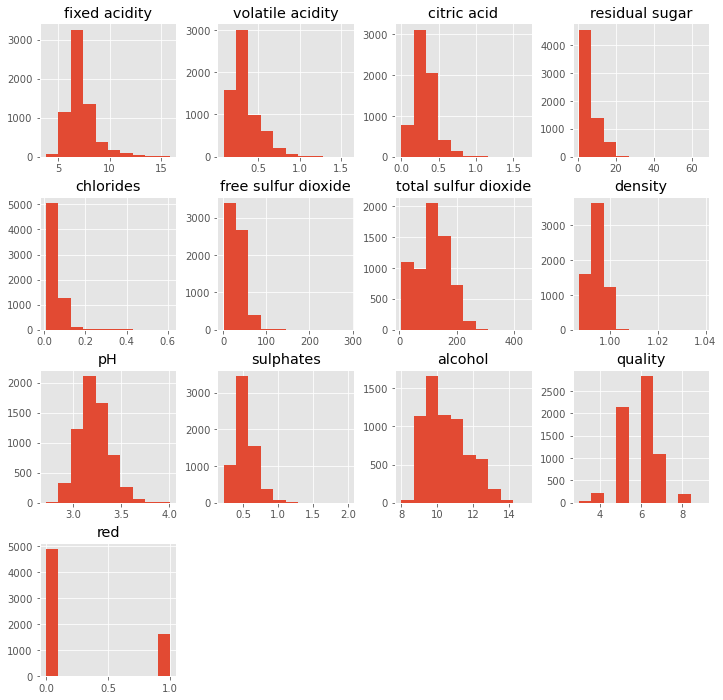

In [36]:
vins.hist(figsize=(12,12))
print("-----------------------------------------------")

<AxesSubplot:>

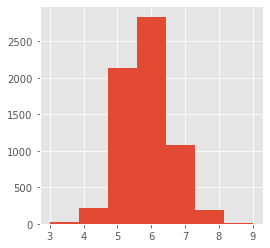

In [38]:
vins.quality.hist(bins=7, figsize=(4,4))

In [42]:
vins[["quality", "red"]].groupby("quality").count()

,red
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


ValueError: cannot reindex from a duplicate axis

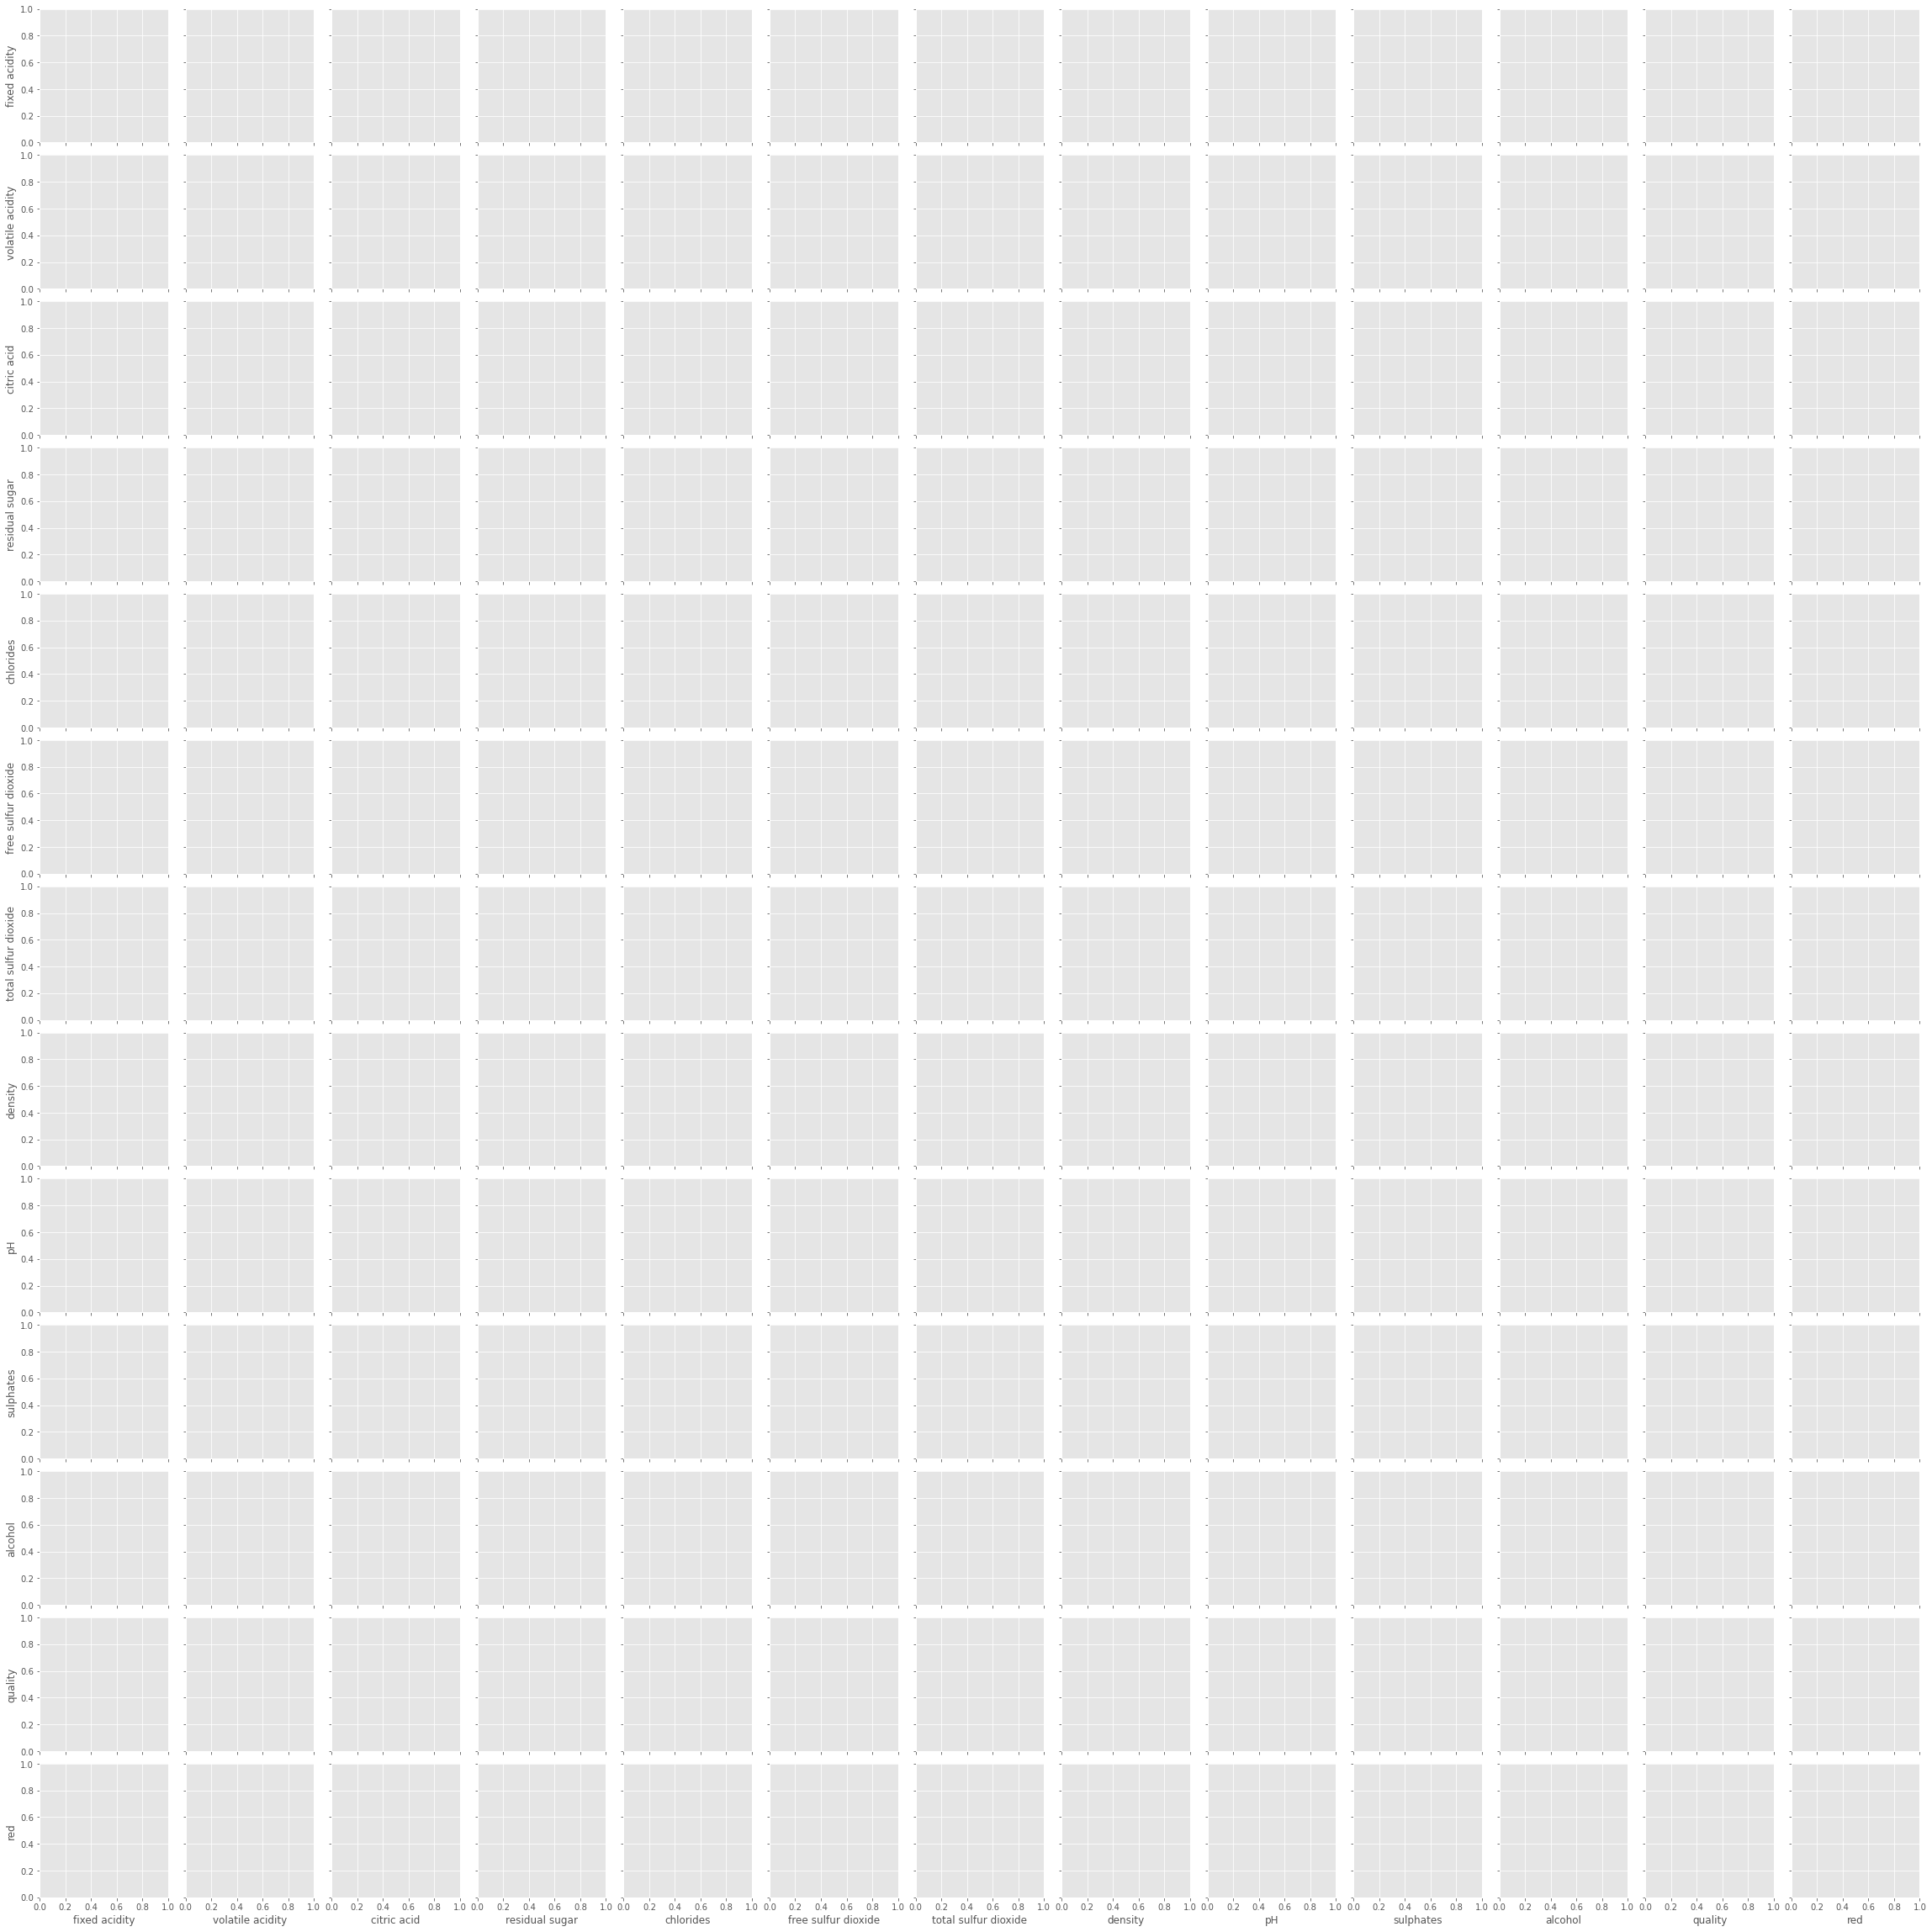

In [45]:
import seaborn
seaborn.pairplot(vins)